In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm
# 将数据集读入到pandas数据框中
wine = pd.read_csv('csv/winequality-both.csv', sep=',', header=0)
wine.columns = wine.columns.str.replace(' ', '_')
print(wine.head())
# 显示所有变量的描述性统计量
print(wine.describe())
# 找出唯一值 
print(sorted(wine.quality.unique()))
# 计算值的频率
print(wine.quality.value_counts())

    type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

                type 
quality  count  red      1599.000000
                white    4898.000000
         mean   red         5.636023
                white       5.877909
         std    red         0.807569
                white       0.885639
         min    red         3.000000
                white       3.000000
         25%    red         5.000000
                white       5.000000
         50%    red         6.000000
                white       6.000000
         75%    red         6.000000
                white       6.000000
         max    red         8.000000
                white       9.000000
dtype: float64
     quality      
type     red white
0.25     5.0   5.0
0.75     6.0   6.0
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: module 'seaborn' has no attribute 'axlabel'

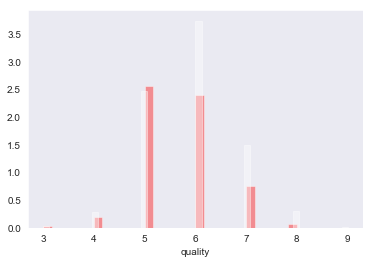

In [15]:
# 按照葡萄酒类型显示质量的描述性统计量
print(wine.groupby('type')[['quality']].describe().unstack('type'))
# 按照葡萄酒类型显示质量的特定分位数值
print(wine.groupby('type')[['quality']].quantile([0.25, 0.75]).unstack('type'))
# 按照葡萄酒类型查看质量分布
red_wine = wine.loc[wine['type']=='red', 'quality']
white_wine = wine.loc[wine['type']=='white', 'quality']
sns.set_style("dark")
print(sns.distplot(red_wine, \
 norm_hist=True, kde=False, color="red", label="Red wine"))
print(sns.distplot(white_wine, \
 norm_hist=True, kde=False, color="white", label="White wine"))
sns.axlabel("Quality Score", "Density")
plt.title("Distribution of Quality by Wine Type")
plt.legend()
plt.show()
# 检验红葡萄酒和白葡萄酒的平均质量是否有所不同
print(wine.groupby(['type'])[['quality']].agg(['std']))
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)
print('tstat: %.3f pvalue: %.4f' % (tstat, pvalue))

In [16]:
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)
print('tstat: %.3f pvalue: %.4f' % (tstat, pvalue))

tstat: -9.686 pvalue: 0.0000


                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity    

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


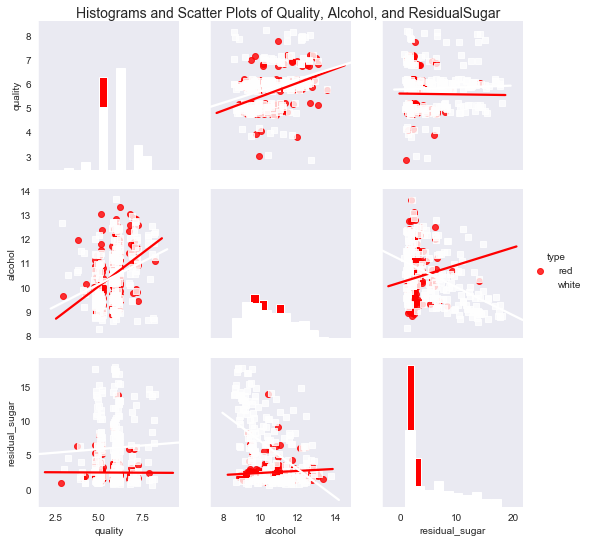

In [17]:
# 计算所有变量的相关矩阵
print(wine.corr())
# 从红葡萄酒和白葡萄酒的数据中取出一个“小”样本来进行绘图
def take_sample(data_frame, replace=False, n=200):
    return data_frame.loc[np.random.choice(data_frame.index, \
    replace=replace, size=n)]
reds_sample = take_sample(wine.loc[wine['type']=='red', :])
whites_sample = take_sample(wine.loc[wine['type']=='white', :])
wine_sample = pd.concat([reds_sample, whites_sample])
wine['in_sample'] = np.where(wine.index.isin(wine_sample.index), 1.,0.)
print(pd.crosstab(wine.in_sample, wine.type, margins=True))
# 查看成对变量之间的关系
sns.set_style("dark")
g = sns.pairplot(wine_sample, kind='reg', plot_kws={"ci": False,\
"x_jitter": 0.25, "y_jitter": 0.25}, hue='type', diag_kind='hist',\
diag_kws={"bins": 10, "alpha": 1.0}, palette=dict(red="red", white="white"),\
markers=["o", "s"], vars=['quality', 'alcohol', 'residual_sugar'])
print(g)
plt.suptitle('Histograms and Scatter Plots of Quality, Alcohol, and Residual\
Sugar', fontsize=14, horizontalalignment='center', verticalalignment='top',\
x=0.5, y=0.999)
plt.show()

In [233]:
test = [1,3,2,1]

In [217]:
def l_len(x):
    if len(x)%2 == 1:
        l_c = int(round(len(x)/2-0.1,0))
    else:
        l_c = int(len(x)/2)
    return l_c


In [218]:
def te(n):
    for i in range(n):
        if test[i] == test[-(i+1)]:
            # print('回文数',test[i],test[-(i+1)])
            if l_len(test) == i+1:
                return True
        else:
            return False
            print('no',test[i],test[-(i+1)])
            
            

In [219]:
te(l_len(test))

True

In [234]:
if len(test)%2 == 1:
    l_c = int(round(len(test)/2-0.1,0))
else:
    l_c = int(len(test)/2)
    

In [235]:
    
for i in range(l_c):
    if test[i] == test[-(i+1)]:
        if l_c == i+1:
            print('True')
    else:
        print('False')

False


In [308]:
class Solution(object):
    def isPalindrome(self, x):
        """
        :type x: int
        :rtype: bool
        """
        try:
            nul = [int(x) for x in str(x)]
            if len(nul)%2 == 1:
                l_c = int(round(len(nul)/2-0.1,0))
            else:
                l_c = int(len(nul)/2)
                
            if len(nul) > 1:
                for i in range(l_c):
                    if nul[i] == nul[-(i+1)]:
                        if l_c == i+1:
                            return True
                    else:
                        return False
            else:
                return True 
        except:
            return False

In [309]:
Solution.isPalindrome(1,-121)

False

In [417]:
try:
    a = 1+'a'
except:
    print('True')

True


In [51]:
s = "babadaaaaabbbcccbbb1"
s = 'bab'

In [52]:
s[0]

'b'

In [64]:
a1 = [0,1,2]
a2 = ['b']
a3 = list(zip(a2,a1))

In [65]:
a3

[('b', 0)]

In [54]:
numb = {}
numb_l = []

for j in s:
    for i in range(s.count(j)):
        numb = j
        numb_l.append(s.find(j,i))


In [42]:
numb_l

[0, 2, 1, 0, 2]

In [13]:
s.find('b',1)

2

In [5]:
def q(s):
    st = 0
    s[st]
    a1 = s.find(s[st],0)
    for j in range(len(s)):
        for i in s[0:st]:
            st += 1

            print(i)
            
            


In [6]:
q(s)

b
b
a
b
a
b


In [3]:
s.find

<function str.find>

In [4]:
test = list(set(s))

test

['b', 'a']

In [5]:
c_a =[]
for i in test:
    print(s.count(i))
    c_a.append(s.count(i))
c_a

2
1


[2, 1]

In [6]:
zd = dict(zip(test,c_a))
zd

{'b': 2, 'a': 1}

In [42]:

for k,y in zd.items():
    wz = []
    # print(k,y)
    # if
    for j in range(y):
        # if s.find('b',j):
        st_wz = s.find(k,j)
        wz.append(st_wz)
        # print(j,s.find(k,j))
        # s[wz[j]:wz[]]
        st_wz
        
        
        

In [41]:
wz

[1]

In [17]:
s.find('a',0)

1

In [9]:
s[0:2][::-1]

'ab'